In [6]:
from huggingface_hub import login
login()

In [7]:
from huggingface_hub import snapshot_download
from pathlib import Path

mistral_models_path = Path.home().joinpath('mistral_models', '7B-Instruct-v0.3')
mistral_models_path.mkdir(parents=True, exist_ok=True)

snapshot_download(repo_id="mistralai/Mistral-7B-Instruct-v0.3", allow_patterns=["params.json", "consolidated.safetensors", "tokenizer.model.v3", "config.json"], local_dir=mistral_models_path)

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

params.json:   0%|          | 0.00/202 [00:00<?, ?B/s]

tokenizer.model.v3:   0%|          | 0.00/587k [00:00<?, ?B/s]

consolidated.safetensors:   0%|          | 0.00/14.5G [00:00<?, ?B/s]

'C:\\Users\\Максим\\mistral_models\\7B-Instruct-v0.3'

In [9]:
mistral_path = r"C:\\Users\\Максим\\mistral_models\\7B-Instruct-v0.3"

In [1]:
pip install mistral-inference==1.3.0

  Using cached fire-0.6.0.tar.gz (88 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached simple_parsing-0.1.6-py3-none-any.whl.metadata (7.3 kB)
  Using cached xformers-0.0.28.post1.tar.gz (7.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [17 lines of output]
      Traceback (most recent call last):
        File "c:\Users\РњР°РєСЃРёРј\Desktop\python\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "c:\Users\РњР°РєСЃРёРј\Desktop\python\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
        File "c:\Users\РњР°РєСЃРёРј\Desktop\python\lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
          return hook(config_settings)
        File "C:\Users\РњР°РєСЃРёРј\AppData\Local\Temp\pip-build-env-glleniak\overlay\Lib\site-packages\setuptools\build_meta.py", line 332, in get_requires_for_build_wheel
          return self._get_build_requires(config_settin

In [14]:
from mistral_inference.transformer import Transformer
from mistral_inference.generate import generate

from mistral_common.tokens.tokenizers.mistral import MistralTokenizer
from mistral_common.protocol.instruct.messages import UserMessage
from mistral_common.protocol.instruct.request import ChatCompletionRequest


tokenizer = MistralTokenizer.from_file(f"{mistral_models_path}/tokenizer.model.v3")
model = Transformer.from_folder(mistral_models_path)

completion_request = ChatCompletionRequest(messages=[UserMessage(content="Explain Machine Learning to me in a nutshell.")])

tokens = tokenizer.encode_chat_completion(completion_request).tokens

out_tokens, _ = generate([tokens], model, max_tokens=64, temperature=0.0, eos_id=tokenizer.instruct_tokenizer.tokenizer.eos_id)
result = tokenizer.instruct_tokenizer.tokenizer.decode(out_tokens[0])

print(result)


ModuleNotFoundError: No module named 'mistral_inference'

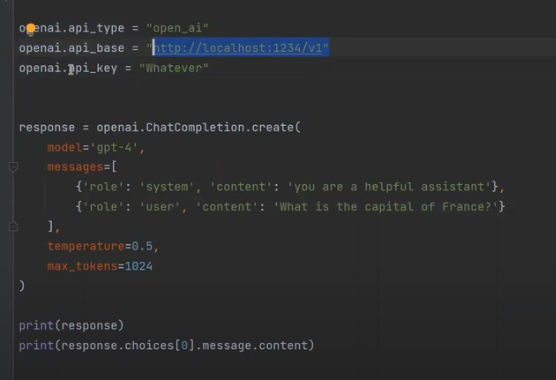

In [6]:
pip install openai==0.28

  Attempting uninstall: openai
    Found existing installation: openai 1.16.2
    Uninstalling openai-1.16.2:
      Successfully uninstalled openai-1.16.2
Note: you may need to restart the kernel to use updated packages.


In [3]:
import openai

openai.api_type = 'open_ai'
openai.api_base = 'http://localhost:1234/v1'
openai.api_key = 'whatever'

response = openai.ChatCompletion.create(
    model='gpt-4',
    messages = [
        {'role': 'user', 'content': 'Расскажи шутку'}
    ],
    temperature=0.5,
    max_tokens=1024
)

# print(response)
print(response.choices[0].message.content)

{
  "id": "chatcmpl-40pfwcje37c6thp3ohwz33",
  "object": "chat.completion",
  "created": 1727477166,
  "model": "lmstudio-community/mathstral-7B-v0.1-GGUF/mathstral-7B-v0.1-Q4_K_M.gguf",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "\u041f\u043e\u0447\u0435\u043c\u0443 \u0443 \u043b\u044f\u0433\u0443\u0448\u043a\u0438 \u0432\u0441\u0435\u0433\u0434\u0430 \u0431\u044b\u0432\u0430\u0435\u0442 \u0445\u043e\u0440\u043e\u0448\u0435\u0435 \u043d\u0430\u0441\u0442\u0440\u043e\u0435\u043d\u0438\u0435? \u041f\u043e\u0442\u043e\u043c\u0443 \u0447\u0442\u043e \u043e\u043d\u0430 \u0432\u0441\u0435\u0433\u0434\u0430 \u043f\u0440\u044b\u0433\u0430\u0435\u0442 \u043d\u0430 \u0441\u0447\u0430\u0441\u0442\u043b\u0438\u0432\u043e\u0439 \u043d\u043e\u0433\u0435!"
      },
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 38,
    "completion_tokens": 42,
    "total_tokens": 80
  },
  "system_finge

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.model_download("mistral-ai/mixtral/pyTorch/8x7b-instruct-v0.1-hf")

print("Path to model files:", path)

In [10]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_id = mistral_path   # "/kaggle/input/mixtral/pytorch/8x7b-instruct-v0.1-hf/1"
tokenizer = AutoTokenizer.from_pretrained(model_id)

model = AutoModelForCausalLM.from_pretrained(model_id)

text = "Hello my name is"
inputs = tokenizer(text, return_tensors="pt")

outputs = model.generate(**inputs, max_new_tokens=20)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


OSError: C:\\Users\\Максим\\mistral_models\\7B-Instruct-v0.3 does not appear to have a file named config.json. Checkout 'https://huggingface.co/C:\\Users\\Максим\\mistral_models\\7B-Instruct-v0.3/tree/None' for available files.